# Lotte (Personal Project)
 - Due to 12.03

## Load Library & Data

In [1]:
library(arules)
library(reshape2)

Warning message:
: package 'arules' was built under R version 3.3.2Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [2]:
lotte <- read.csv("lotte.csv")
lotte <- lotte[,-8]

In [3]:
colnames(lotte) <- c("seq","N1","N2","N3","N4","N5","N6")

In [4]:
head(lotte[order(lotte$seq, decreasing = F),])

,seq,N1,N2,N3,N4,N5,N6
730,1,10,23,29,33,37,40
729,2,9,13,21,25,32,42
728,3,11,16,19,21,27,31
727,4,14,27,30,31,40,42
726,5,16,24,29,40,41,42
725,6,14,15,26,27,40,42


## Data Reshaping 
 - $Transacition\ Data$ 형성을 위해 $Reshape$ ($Melt$를  $seq$를 기준으로 수행)

In [5]:
melt_lotte <- melt(lotte, id="seq")

In [6]:
melt_lotte[melt_lotte$seq ==730,]

,seq,variable,value
1,730,N1,4
731,730,N2,10
1461,730,N3,14
2191,730,N4,15
2921,730,N5,18
3651,730,N6,22


## Pick data from DF

In [7]:
data <- melt_lotte[,c(1,3)] # seq, value

In [8]:
head(data[order(data$seq,decreasing = T),])

,seq,value
1,730,4
731,730,10
1461,730,14
2191,730,15
2921,730,18
3651,730,22


# Split Data with seq number
 - $Value$를 $Seq$로 $Split$한다.

In [9]:
head(split(data$value, data$seq))

$`1`
[1] 10 23 29 33 37 40

$`2`
[1]  9 13 21 25 32 42

$`3`
[1] 11 16 19 21 27 31

$`4`
[1] 14 27 30 31 40 42

$`5`
[1] 16 24 29 40 41 42

$`6`
[1] 14 15 26 27 40 42

## Make Transactions 

In [10]:
trans <- as(split(data$value, data$seq), "transactions") #transactions 메소드 
trans 

transactions in sparse format with
 730 transactions (rows) and
 45 items (columns)

## Inspect a transaction
 - 각 회차별 나온 숫자를 Transaction으로 변형 

In [11]:
inspect(trans[1:10])

     items               transactionID
[1]  {10,23,29,33,37,40} 1            
[2]  {9,13,21,25,32,42}  2            
[3]  {11,16,19,21,27,31} 3            
[4]  {14,27,30,31,40,42} 4            
[5]  {16,24,29,40,41,42} 5            
[6]  {14,15,26,27,40,42} 6            
[7]  {2,9,16,25,26,40}   7            
[8]  {8,19,25,34,37,39}  8            
[9]  {2,4,16,17,36,39}   9            
[10] {9,25,30,33,41,44}  10           


## Image of Transaction 
 - 1 ~ 45 까지 숫자 중 각 회차별 새당 되는 숫자에 색이 칠해진다.

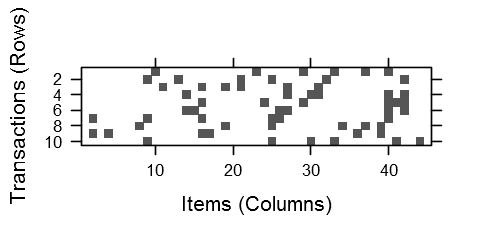

In [12]:
options(repr.plot.width=4,repr.plot.height=2)
image(trans[1:10])

### Check Frequency of items 
 - 각 회차에 나온 개별의 숫자들의 빈발 정도를 확인 (absolute : Counts of values)

In [13]:
t(itemFrequency(trans, type="absolute"))

1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
109,95,96,105,102,91,100,104,72,99,...,96,108,91,99,114,86,87,101,100,98


### Check Posibility of items 
 - 각 회차에 나온 개별 숫자들의 나온 확률을 확인 

In [14]:
t(round(itemFrequency(trans)[order(itemFrequency(trans), decreasing = TRUE)],2))

20,40,34,27,1,37,4,14,17,8,...,21,23,16,30,42,41,28,32,22,9
0.16,0.16,0.15,0.15,0.15,0.15,0.14,0.14,0.14,0.14,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.11,0.1


### Plotting items with support 
 - 상위 20개 지지도를 가진 Items를 Plotting

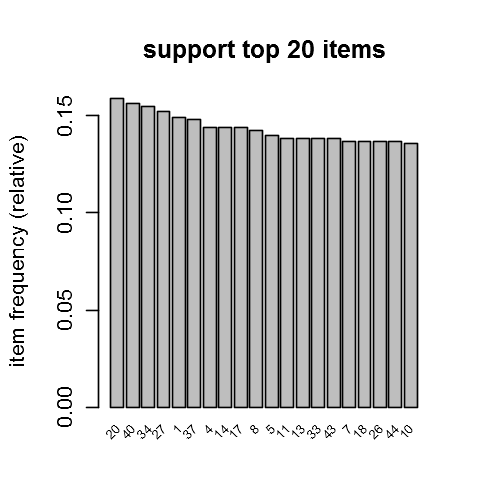

In [15]:
options(repr.plot.width=4,repr.plot.height=4)
itemFrequencyPlot(trans, topN = 20, main = "support top 20 items",cex.names=0.6)

## Making rules with transaction data, Lotte 
 - 최소 지지도를 넘는 빈발 집합을 출력. 
 - Transaction ID 는 필요 없으므로 제외 

In [16]:
rules <- apriori(trans[,-2],parameter = list(support=0.005,target="frequent itemsets"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[44 item(s), 730 transaction(s)] done [0.00s].
sorting and recoding items ... [44 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [1241 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


 - 크기 1 : 44개 
 - 크기 2 : 941개
 - 크기 3 : 256개 
 
### summary of quality measures 
 - 최소 지지도 : 0.0055
 - 최대 지지도 : 0.1589

In [17]:
summary(rules)

set of 1241 itemsets

most frequent items:
     40      20      27       7      35 (Other) 
     76      74      70      68      68    2338 

element (itemset/transaction) length distribution:sizes
  1   2   3 
 44 941 256 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.171   2.000   3.000 

summary of quality measures:
    support        
 Min.   :0.005479  
 1st Qu.:0.008219  
 Median :0.013699  
 Mean   :0.017469  
 3rd Qu.:0.017808  
 Max.   :0.158904  

includes transaction ID lists: FALSE 

mining info:
        data ntransactions support confidence
 trans[, -2]           730   0.005          1

In [18]:
inspect(rules[1:10])

     items support   
[1]  {9}   0.09863014
[2]  {22}  0.11232877
[3]  {28}  0.11643836
[4]  {32}  0.11643836
[5]  {41}  0.11780822
[6]  {42}  0.11917808
[7]  {30}  0.11917808
[8]  {16}  0.12191781
[9]  {21}  0.12328767
[10] {23}  0.12328767


### Top 10 of the Support

In [19]:
inspect(sort(rules, by = "support")[1:10]) 

     items support  
[1]  {20}  0.1589041
[2]  {40}  0.1561644
[3]  {34}  0.1547945
[4]  {27}  0.1520548
[5]  {1}   0.1493151
[6]  {37}  0.1479452
[7]  {17}  0.1438356
[8]  {4}   0.1438356
[9]  {14}  0.1438356
[10] {8}   0.1424658


### Find 3 Set of Rules
 - {19,25,28} 0.006849315 is Maximum support 3 Set

In [20]:
inspect(sort(rules[rules@quality$support >= 0.005 & rules@quality$support <= 0.00685], by = "support")[25:40])

     items      support    
[1]  {24,43}    0.006849315
[2]  {31,39}    0.006849315
[3]  {19,25,28} 0.006849315
[4]  {15,28,34} 0.006849315
[5]  {4,28,40}  0.006849315
[6]  {10,16,41} 0.006849315
[7]  {34,42,45} 0.006849315
[8]  {5,18,42}  0.006849315
[9]  {14,27,30} 0.006849315
[10] {11,14,21} 0.006849315
[11] {23,29,44} 0.006849315
[12] {23,35,43} 0.006849315
[13] {6,7,15}   0.006849315
[14] {6,18,31}  0.006849315
[15] {11,29,44} 0.006849315
[16] {27,29,40} 0.006849315


In [26]:
df <- as.data.frame(inspect(sort(rules, by = "support")))

       items      support    
[1]    {20}       0.158904110
[2]    {40}       0.156164384
[3]    {34}       0.154794521
[4]    {27}       0.152054795
[5]    {1}        0.149315068
[6]    {37}       0.147945205
[7]    {17}       0.143835616
[8]    {4}        0.143835616
[9]    {14}       0.143835616
[10]   {8}        0.142465753
[11]   {5}        0.139726027
[12]   {33}       0.138356164
[13]   {11}       0.138356164
[14]   {43}       0.138356164
[15]   {13}       0.138356164
[16]   {44}       0.136986301
[17]   {7}        0.136986301
[18]   {18}       0.136986301
[19]   {26}       0.136986301
[20]   {25}       0.135616438
[21]   {15}       0.135616438
[22]   {39}       0.135616438
[23]   {10}       0.135616438
[24]   {19}       0.134246575
[25]   {45}       0.134246575
[26]   {31}       0.134246575
[27]   {3}        0.131506849
[28]   {36}       0.131506849
[29]   {24}       0.130136986
[30]   {12}       0.128767123
[31]   {35}       0.126027397
[32]   {6}        0.124657534
[33]   {38

In [28]:
head(df[1000:10000,])

,items,support
[1000],"{27,29,40}",0.00684931506849315
[1001],"{35,43,45}",0.00684931506849315
[1002],"{14,35,39}",0.00684931506849315
[1003],"{20,35,40}",0.00684931506849315
[1004],"{12,15,24}",0.00684931506849315
[1005],"{4,12,24}",0.00684931506849315


In [34]:
library(stringr)

In [38]:
df$items = str_replace(string = df$items,pattern = "\\{",replacement = "")
df$items = str_replace(string = df$items,pattern = "\\}",replacement = "")

In [40]:
head(df[1000:10000,])

,items,support
[1000],"27,29,40",0.00684931506849315
[1001],"35,43,45",0.00684931506849315
[1002],"14,35,39",0.00684931506849315
[1003],"20,35,40",0.00684931506849315
[1004],"12,15,24",0.00684931506849315
[1005],"4,12,24",0.00684931506849315


In [78]:
for(i in df[1000,1]){
    print(i)
}

[1] "27,29,40"


In [84]:
count <- function(x){
    cnt <- 0
    x <- strsplit(x,",")
    for(i in x){
        print(i)
        cnt = cnt + 1
    }
    return(cnt)
}

In [85]:
count(df[1000,1])

[1] "27" "29" "40"


[1] 1